<a href="https://colab.research.google.com/github/alexhosp/startup-viability-analysis/blob/main/customer-segmentation/notebooks%20/01_data_collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collection for Customer Segmentation
## Introduction
This notebook focuses on collecting data to identify and segment potential customers for a proposed AI-driven gardening robot startup. We will use multiple APIs to gather data from sources such as Google Trends, Twitter, Reddit, Google Custom Search, Kaggle, Google Dataset Search, and UCI Machine Learning Repository. All raw data will be stored in Google Cloud Storage (GCS).
## Steps
1. [Setup and GCS Configuration](#setup-gcs-configuration)
2. [Definition of Initial Keywords](#initial-keywords-definition)
3. [API Authentication and Configuration](#api-authentication-configuration)
4. [Defining Data Collection Functions]
* Google Trends API
1. Collect relevant data
2. Clean and transform data
3. Store data in BigQuery

*Decide on how to proceed here, Twitter API might not be accessible*

* Twitter API
* Reddit API
* Google Custom Search API
5. Executing Data Collection Functions
6. Storing Data in GCS
7. Semantic Expansion of Keywords
8. Definition of Additional Keywords
9. Defining Data Collection Functions for Structured Data
* Kaggle API
* Google Dataset Search API
* UCI Machine Learning Repository API
10. Executing Data Collection for Additional Data
11. Iterative Data Collection


<a name="setup-gcs-configuration"></a>
## Setup and GCS Configuration
In this section, we will install necessary packages, import libraries, and configure Google Cloud Storage (GCS).

In [235]:
# Install and import necessary libraries
!pip install google-cloud-storage
from google.cloud import storage
import pandas as pd
from google.colab import auth

In [236]:
# Authenticate with GCP
auth.authenticate_user()

In [237]:
# Set up GCS client
gcs_client = storage.Client()

<a name="initial-keywords-definition"></a>
# Definition of Initial Keywords
The initial keywords are chosen to gather data on the interest of features of a proposed prototype and the relevance of problems and needs the prototype seeks to address.

## Read in the keyword lists from GitHub

In [9]:
# Import necessary libraries
!pip install requests
import requests

In [129]:
# Define file paths
base_url = 'https://raw.githubusercontent.com/alexhosp/startup-viability-analysis/main/customer-segmentation/data/raw/'
files = ['features.txt', 'problems.txt', 'needs.txt']

# Retrieve text files and convert them to Python lists
features = requests.get(base_url + files[0]).text.splitlines()
problems = requests.get(base_url + files[1]).text.splitlines()
needs = requests.get(base_url + files[2]).text.splitlines()
len(features)

55

<a name='api-authentication-configuration'></a>
# Pytrends API Authentication & Configuration

In [130]:
# Import necessary libraries
!pip install pytrends
from pytrends.request import TrendReq
!pip install urllib3==1.25.11

In [12]:
# Initialize Pytrends
pytrends = TrendReq(hl='en-US', tz=360, timeout=(5,20), retries=2)

In [33]:
# Import datetime
from datetime import datetime, timedelta

In [58]:
# Define timeframe
end_date = datetime.now()
start_date = end_date - timedelta(days=3*365)
end_date
start_date_str = start_date.strftime('%Y-%m-%d')
end_date_str = end_date.strftime('%Y-%m-%d')
timeframe = f'{start_date_str} {end_date_str}'
timeframe

'2021-06-28 2024-06-27'

## Get interest over time for proposed features

In [131]:
# Split features list into 5 keywords chunks
batch_size = 5
features_chunks = [features[i:i+batch_size] for i in range(0, len(features), batch_size)]
len(features_chunks)

11

In [132]:
# Initialize list to store output dataframes
features_dataframes = []
# Loop through the feature list and return interest over time per 5 keywords
for i, chunk in enumerate(features_chunks):
  print(f"Processing chunk {i+1}/{len(features_chunks)}: {chunk}")
  pytrends.build_payload(kw_list=chunk, timeframe=timeframe)
  df = pytrends.interest_over_time()
  df = df.iloc[:-1]  # Remove the last row (most recent, partial week)
  if 'isPartial' in df.columns:
        df = df.drop(columns=['isPartial'])
  print(f"DataFrame shape: {df.shape}")
  features_dataframes.append(df)
  print(f"Processed chunk {i+1}/{len(features_chunks)}")
print(f"Number of dataframes: {len(features_dataframes)}")

Processing chunk 1/11: ['Computer vision for environmental understanding', 'Real-time monitoring sensors', 'Raspberry Pi processing for community engagement', 'Hexapod mobility and agility', 'Portable agricultural technology']
DataFrame shape: (156, 5)
Processed chunk 1/11
Processing chunk 2/11: ['Indoor and outdoor ecosystem management', 'Environmental data to mobile app', 'Robot control and monitoring app', 'Plant classification and beneficial relationships', 'Self-sufficient ecosystem design']
DataFrame shape: (156, 5)
Processed chunk 2/11
Processing chunk 3/11: ['Ecosystem health classification', 'Educational information on plants and environments', 'Modular plug-and-play design for sensors and tools', 'Real-time environment monitoring', 'Plant detection']
DataFrame shape: (156, 5)
Processed chunk 3/11
Processing chunk 4/11: ['Plant health classification', 'Plant relationship identification in ecosystems', 'Beneficial ecosystem modeling', 'Ecosystem risk detection', 'Accessible for

In [136]:
len(features_dataframes)

11

In [137]:
# Combine all dataframes into a single dataframe
features_interest_over_time_df = pd.concat(features_dataframes, axis=1)
features_interest_over_time_df.tail()


,Computer vision for environmental understanding,Real-time monitoring sensors,Raspberry Pi processing for community engagement,Hexapod mobility and agility,Portable agricultural technology,Indoor and outdoor ecosystem management,Environmental data to mobile app,Robot control and monitoring app,Plant classification and beneficial relationships,Self-sufficient ecosystem design,...,Adaptive algorithms for environmental conditions,Support for local biodiversity,Resource-efficient plant growth with minimal external inputs,Energy-efficient with solar charging for outdoor use,Remote access and control,AI-driven recommendations for food system health,AI-driven recommendations,Food system health,Plant identification,Automated gardening
date,,,,,,,,,,,,,,,,,,,,,
2024-05-19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,67,0,0,16,63,0
2024-05-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,58,0,0,15,61,0
2024-06-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,87,0,0,16,62,0
2024-06-09,0,21,0,0,0,0,0,0,0,0,...,0,2,0,0,58,0,0,17,56,0
2024-06-16,0,46,0,0,0,0,0,0,0,0,...,0,4,0,0,55,0,1,11,55,0


In [140]:
features_interest_over_time_df.shape[0]

156

In [ ]:
highest_interest_sorted = features_interest_over_time_df.sum().sort_values(ascending=False)
highest_interest_sorted.head(10)

# Determine features with most interest
Determine the features with most interest and features with zero interest and sort the table accordingly.

In [169]:
# Calculate the sum of values in each column and sort in descending order
sorted_by_interest = features_interest_over_time_df.sum().sort_values(ascending=False)

# Determine keywords with no interest
zero_interest_keywords = sorted_by_interest[sorted_by_interest == 0].index.tolist()
zero_interest_keywords

#Sort remaining keywords by interest
sorted_by_interest = sorted_by_interest[sorted_by_interest != 0]
sorted_by_interest

# Format keywords in a table
features_by_interest = pd.DataFrame(data=sorted_by_interest, columns=['interest'])
features_by_interest.head()

,interest
Solar powered,10708
Plant detection,9933
Plant identification,8346
Educational value,8228
Remote access and control,7722


Interest is measured as the sum of monthly Google Trends Interest values (from 0 to 100) over a period of three years.

## Determine weekly average interest per keyword
Data has been collected over a period of 3 years or 156 days. Google determines the pooularity of a keyword per week on a scale from 1 - 100.

In [164]:
features_by_interest['weekly_average_interest'] = round(features_by_interest['interest'] / 156.42, 3)
features_by_interest.head()

,interest,monthly_average_interest,weekly_average_interest
Solar powered,10708,297.44,68.457
Plant detection,9933,275.92,63.502
Plant identification,8346,231.83,53.356
Educational value,8228,228.56,52.602
Remote access and control,7722,214.50,49.367


## Determine keywords with no interest
Either these keywords need to be improved, or the features are of minimal value to consumers.

In [174]:
zero_interest_keywords = pd.DataFrame(zero_interest_keywords, columns=['zero_interest_keywords'])
zero_interest_keywords.head()

,zero_interest_keywords
0,Accessible for small-scale farmers and consumers
1,Affordable for end users
2,Automated gardening
3,Beneficial ecosystem modeling
4,Bioinspired hexapod design for complex terrain...


Some of these keywords are too complex and need to restated.

## Visualize how feature interest changes over time

In [175]:
# Install necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt


In [193]:
# Create dataframe with monthly time intervals
features_interest_over_time_monthly = features_interest_over_time_df.resample('M').sum()
features_interest_over_time_monthly.index = features_interest_over_time_monthly.index.strftime('%B %Y')

In [203]:
# Include only column with more than 0 total interest
non_zero_columns = features_interest_over_time_monthly.sum()[features_interest_over_time_monthly.sum() > 0].index
features_interest_over_time_monthly = features_interest_over_time_monthly[non_zero_columns]

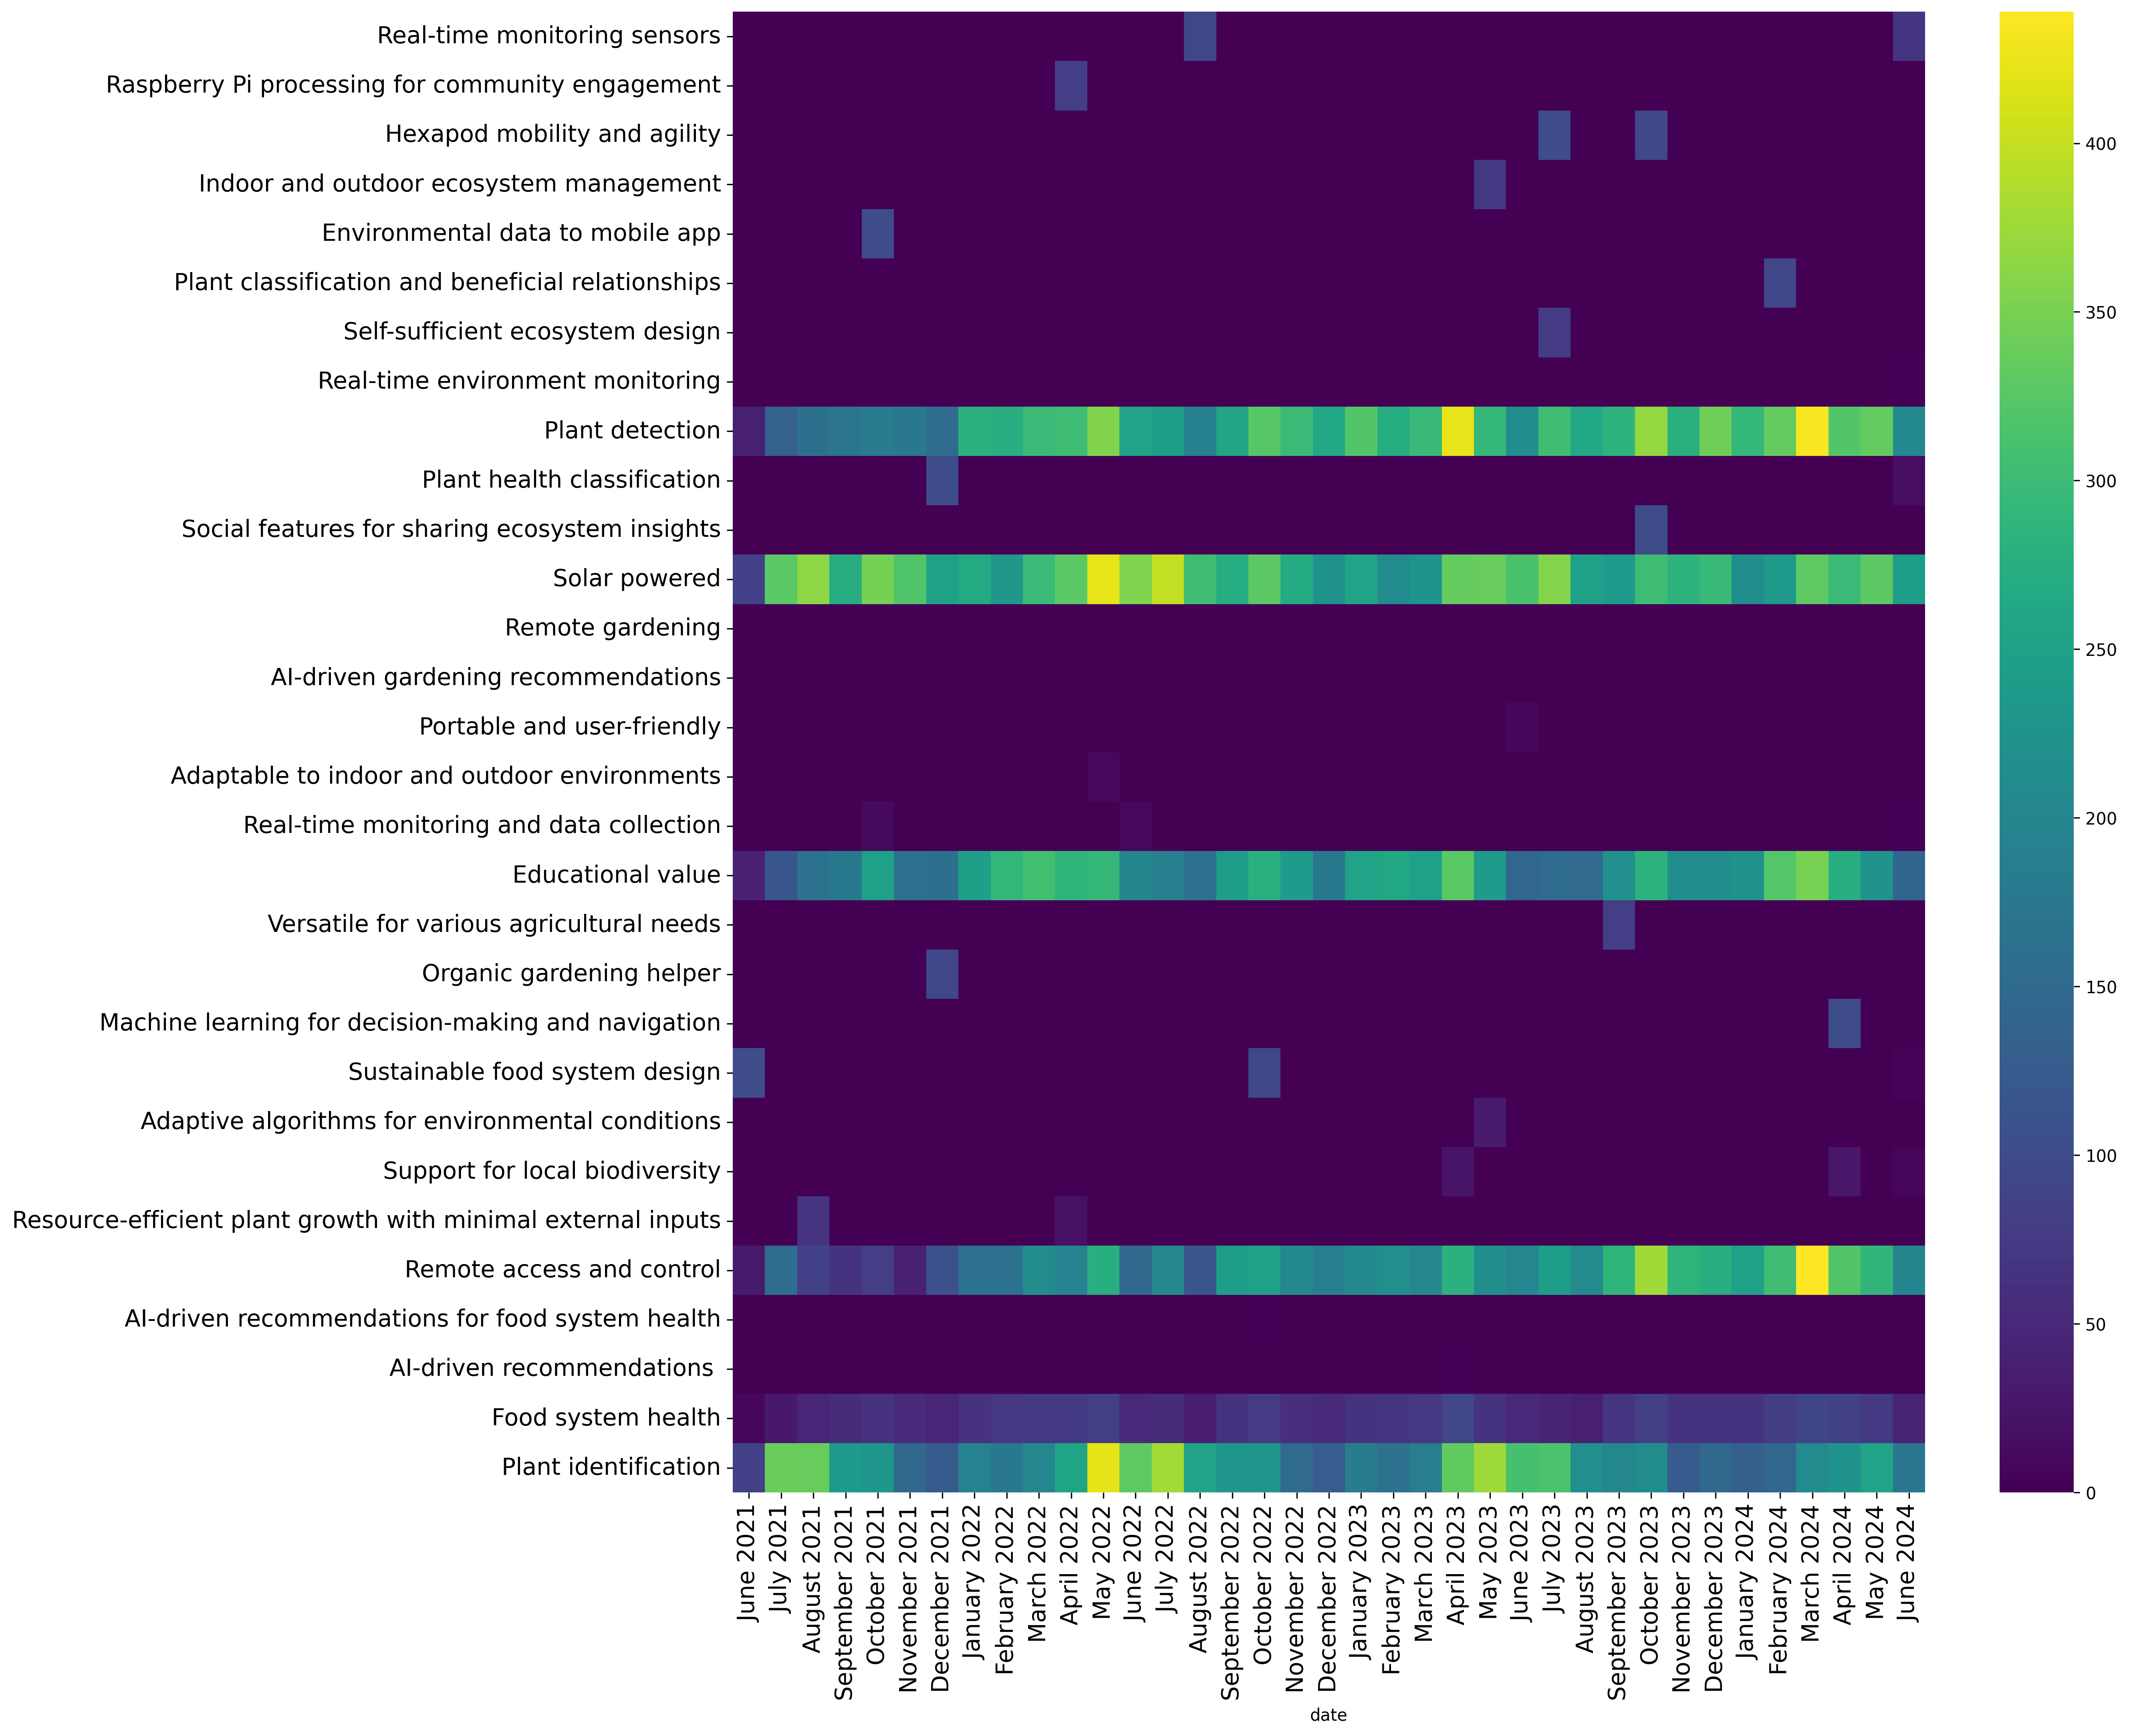

In [215]:
# Create a heatmap to understand how interest changed over time
plt.figure(figsize=(16, 16), dpi=300)
sns.heatmap(data=features_interest_over_time_monthly.T, cmap='viridis', annot=False, cbar=True);
plt.yticks(fontsize=14)
plt.xticks(fontsize=14);

## Visualize most relevant features

In [223]:
# Flatten the dataframe
features_by_interest_flat = features_by_interest.reset_index()
features_by_interest_flat.head()

,index,interest
0,Solar powered,10708
1,Plant detection,9933
2,Plant identification,8346
3,Educational value,8228
4,Remote access and control,7722


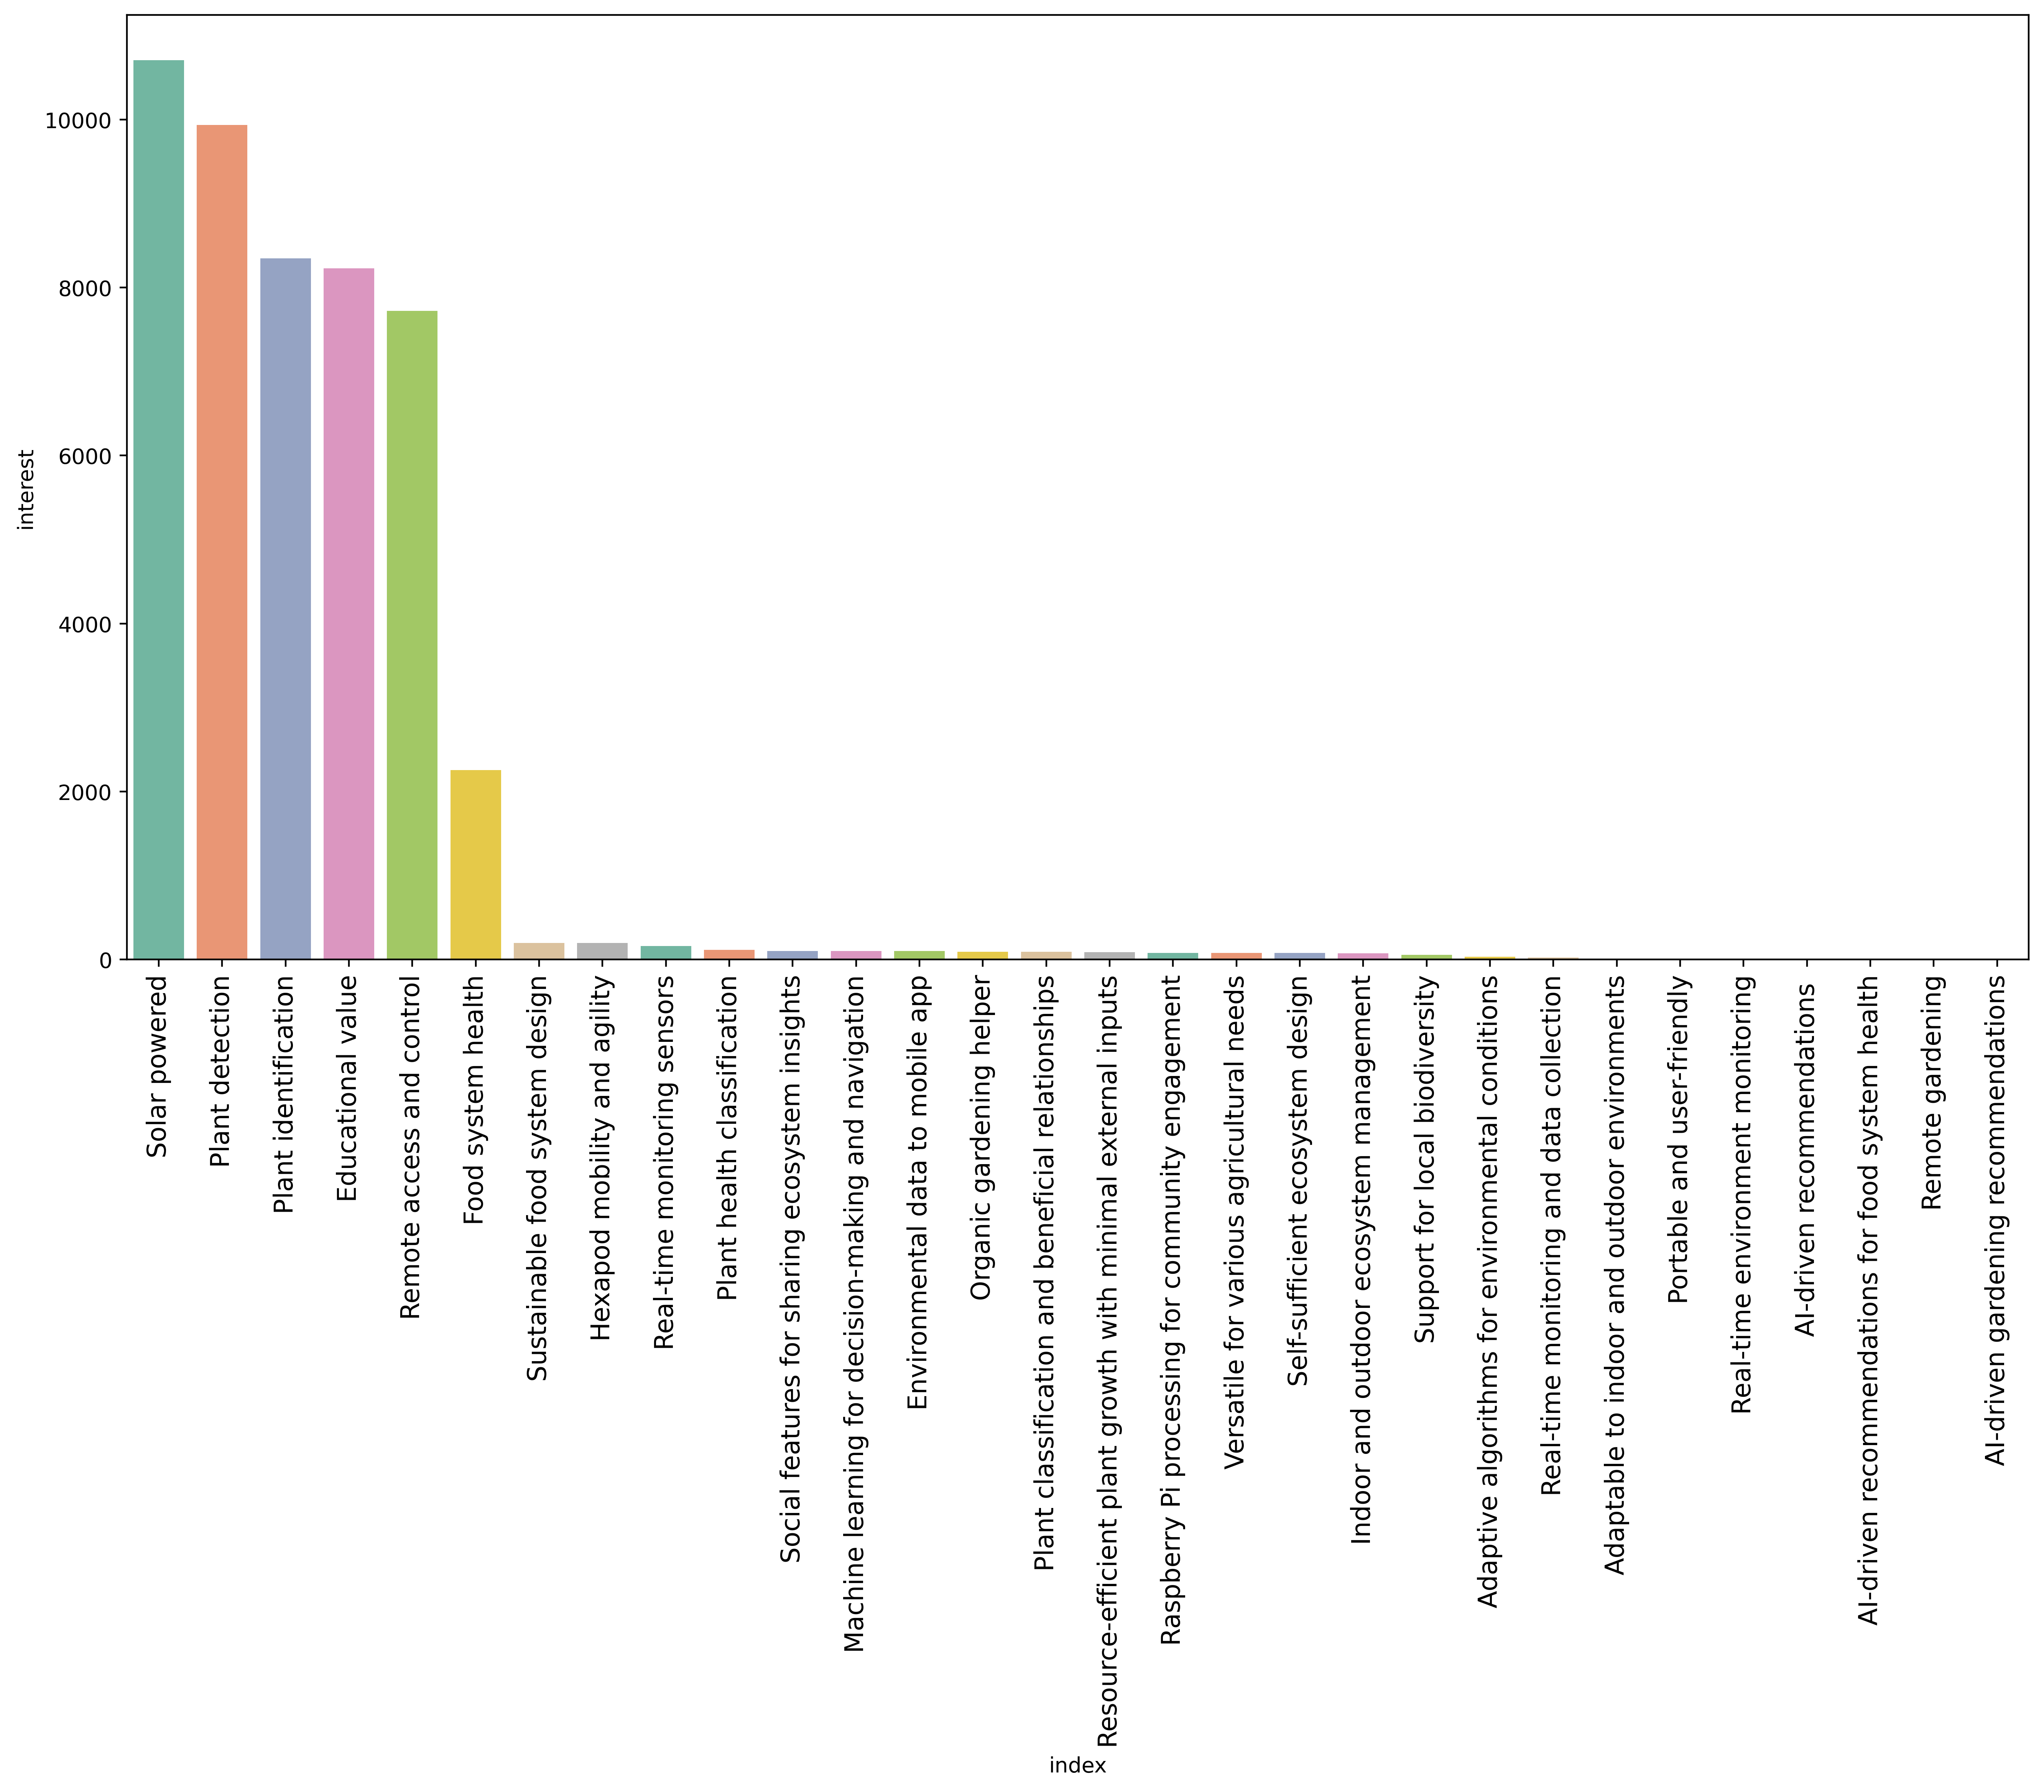

In [229]:
# Visualize overall interest in proposed features
plt.figure(figsize=(16, 8), dpi=400)
sns.barplot(data=features_by_interest_flat, x='index', y='interest', hue='index', palette='Set2');
plt.xticks(rotation=90, fontsize=12);

In [231]:
features_by_interest['weekly_average_interest'] = round(features_by_interest['interest'] / 156.42, 3)
features_by_interest.head()

,interest,weekly_average_interest
Solar powered,10708,68.457
Plant detection,9933,63.502
Plant identification,8346,53.356
Educational value,8228,52.602
Remote access and control,7722,49.367


# Store the features_by_interest table in Google Cloud Storage

,interest,weekly_average_interest
Solar powered,10708,68.457
Plant detection,9933,63.502
Plant identification,8346,53.356
Educational value,8228,52.602
Remote access and control,7722,49.367


In [ ]:
# Store the dataframe in GSC as a parquet file - without writing it to local storage (drive)